<a href="https://colab.research.google.com/github/AL-SayedHamdy/The-Sparks-Foundation/blob/main/Exploratory_Data_Analysis_Sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the libraries**

In [31]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings ('ignore')
sns.set(style="darkgrid") 
%matplotlib inline

# **Data understanding**

In [2]:
matches = pd.read_csv('/content/matches.csv')
deliv = pd.read_csv('/content/deliveries.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**So we have two data frames the matches contain 18 columns and the delivery includes 21 columns or features. So the next step will be the connection between these features in each data frame.**

In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [8]:
matches.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

**We know there are some missing values in both data frames, we will keep it in mind and remember these columns so we can deal with them if we needed to.**

# **Data visualization, EDA and analysis**

In [10]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

**Let's first see how many matches were in every season and let's compare these seasons together.**

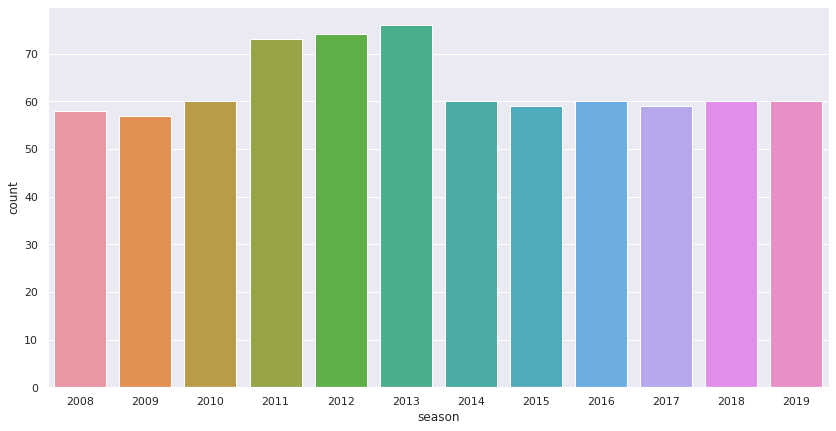

In [11]:
plt.figure(figsize=(14, 7))
sns.countplot(x='season', data=matches)

***Conclusion***


*   the season of 2013 is the season with the most played matches.
*   The season of 2009 is the season with the fewer played matches.



**Now let's see what is the most winning team in our dataset.**

In [12]:
matches['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

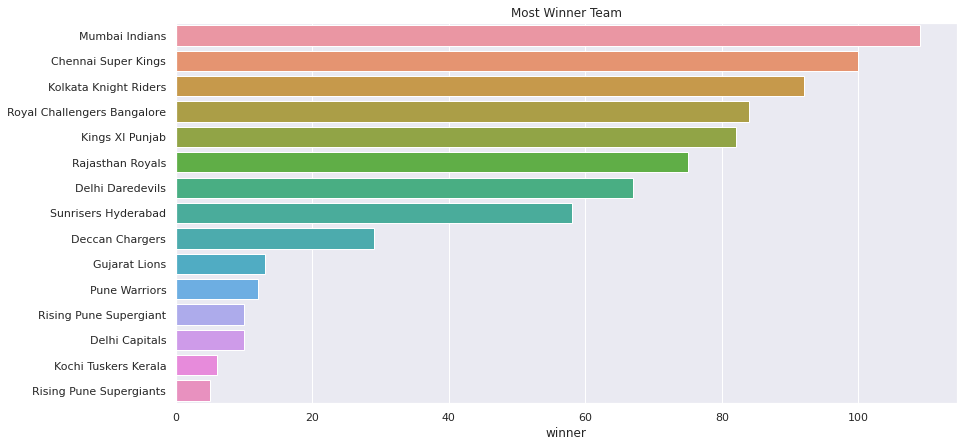

In [13]:
most_win = matches.winner.value_counts()
plt.figure(figsize=(14, 7))
plt.title('Most Winner Team')
sns.barplot(x=most_win, y= most_win.index)

***Conclusion***


*   The most winning team in Mumbai Indians
*   And the team with fewer wins is Rising Pune Supergiants.



**Now we need to check the top players.**

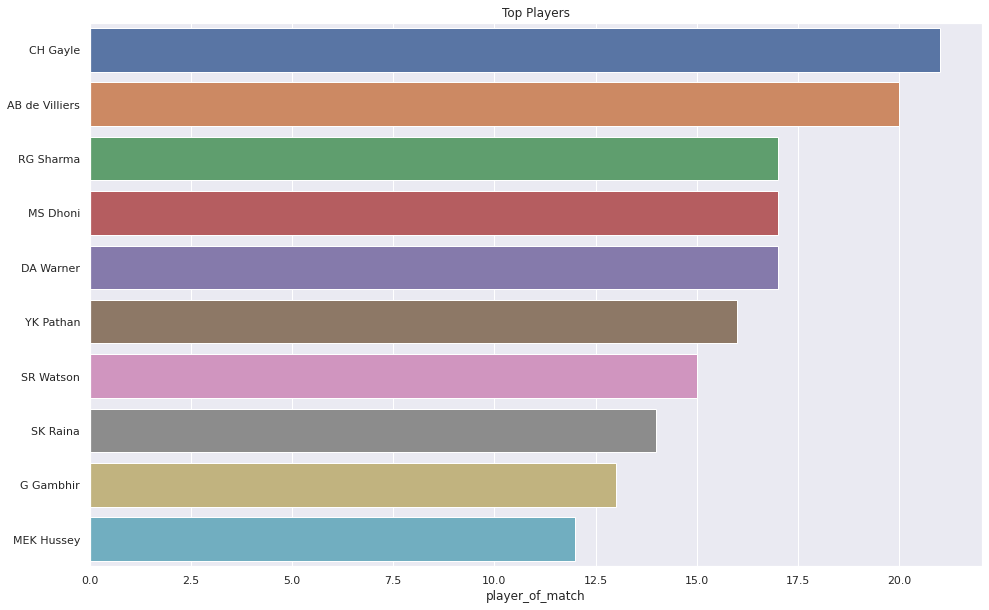

In [14]:
top_player = matches.player_of_match.value_counts()[:10]
plt.figure(figsize=(16, 10))
plt.title('Top Players')
sns.barplot(x=top_player, y=top_player.index)

***Conclusion***


*   The best player is CH Gayle




**Let's see the venues and what is the most stadium  that got used in the matches**

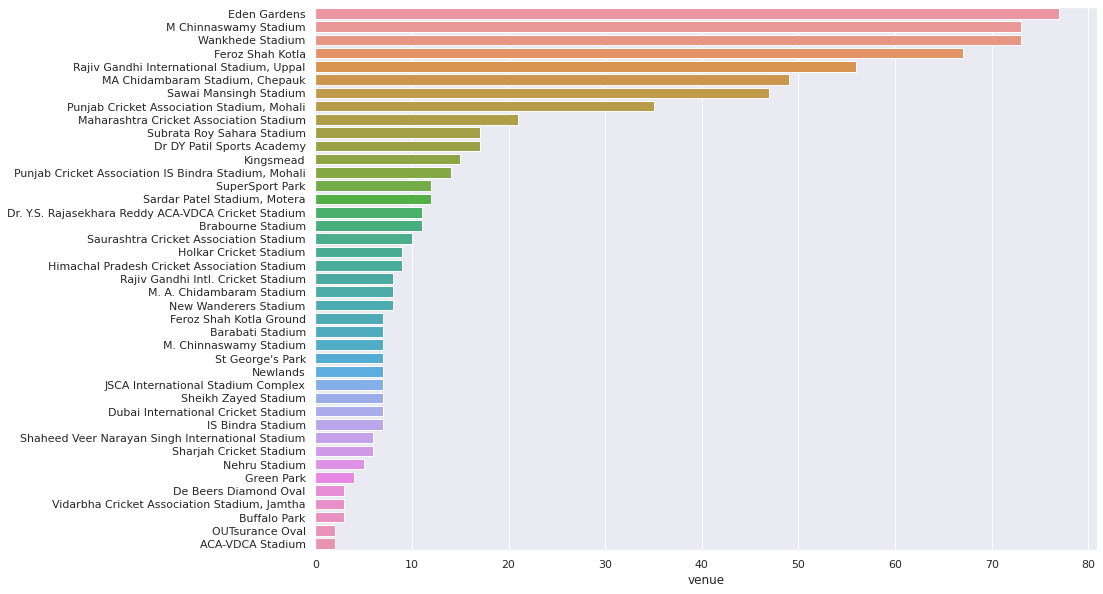

In [15]:
ven = matches.venue.value_counts()
plt.figure(figsize=(14, 10))
sns.barplot(x=ven, y=ven.index)

***Conclusion***


*   The most of the matched played on Eden Gardens stadium which make it the most stadium that got used in our dataset.
*   On the other side the OUTsurance Oval and ACA-VDCA stadium didn't get used a lot.



**Now let's see the teams and how many matches they played**

In [16]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [17]:
matches['team2'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [18]:
teams = pd.melt(matches, id_vars=['id','season'], value_vars=['team1', 'team2'])
teams

,id,season,variable,value
0,1,2017,team1,Sunrisers Hyderabad
1,2,2017,team1,Mumbai Indians
2,3,2017,team1,Gujarat Lions
3,4,2017,team1,Rising Pune Supergiant
4,5,2017,team1,Royal Challengers Bangalore
...,...,...,...,...
1507,11347,2019,team2,Mumbai Indians
1508,11412,2019,team2,Mumbai Indians
1509,11413,2019,team2,Delhi Capitals
1510,11414,2019,team2,Chennai Super Kings


**Number of matches played by each team**

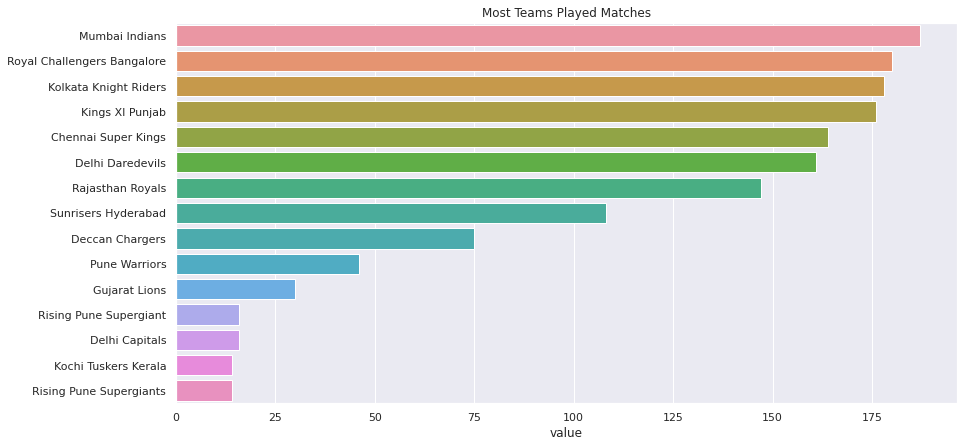

In [28]:
teams_vs = teams.value.value_counts()
plt.figure(figsize=(14, 7))
plt.title('Most Teams Played Matches')
sns.barplot(x=teams_vs, y=teams_vs.index)

**Now let's see which team had the most wins**

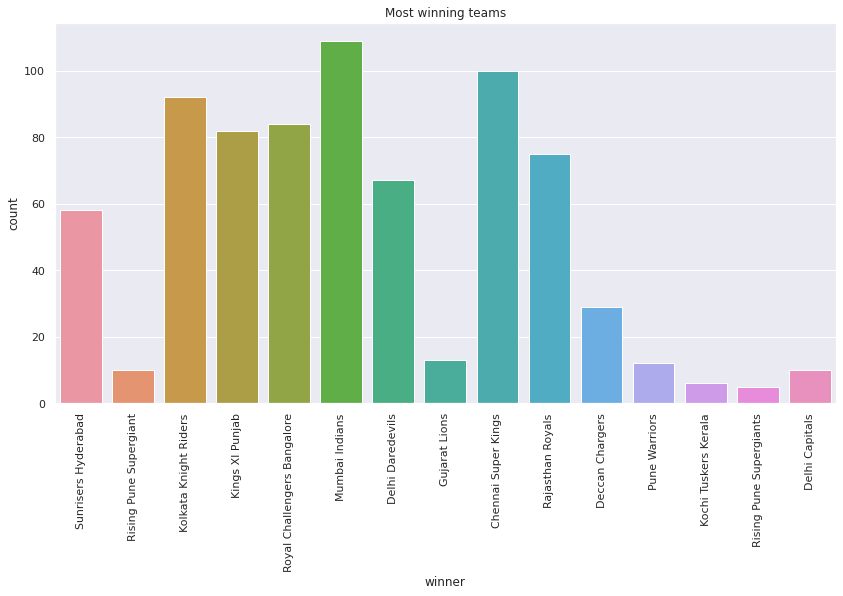

In [27]:
plt.figure(figsize=(14, 7))
plt.title('Most winning teams')
plt.xticks(rotation='vertical')
sns.countplot(x='winner', data=matches)

***Conclusion***


*   The most team played matches was Mumbai Indians


*   And the most winning team was also Mumbai Indians
*   The teams with fewer matches were Kushi Tuskers and Rising Pune

*   But the less team winning was Rising Pune



**Now let's check the champion of each season**

In [29]:
winners_df = matches.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
winners_df

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


**Now let's see the toss decisions**

In [30]:
matches['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

**So we just have bat or field, now let's check each on percentage**

In [34]:
fig = px.pie(matches, names='toss_decision', height=600, width= 600, color_discrete_sequence=['#7F2411', '#000000'], title='The Toss Decisions')
fig.update_traces(textfont_size=15)
fig.show()

***Conclusion***


*   The field toss decision was higher than the bat with 61.2%
*   The bat toss decision with 38.8% of the decisions



**Now let's see the top players and who is the most one had the top player award**

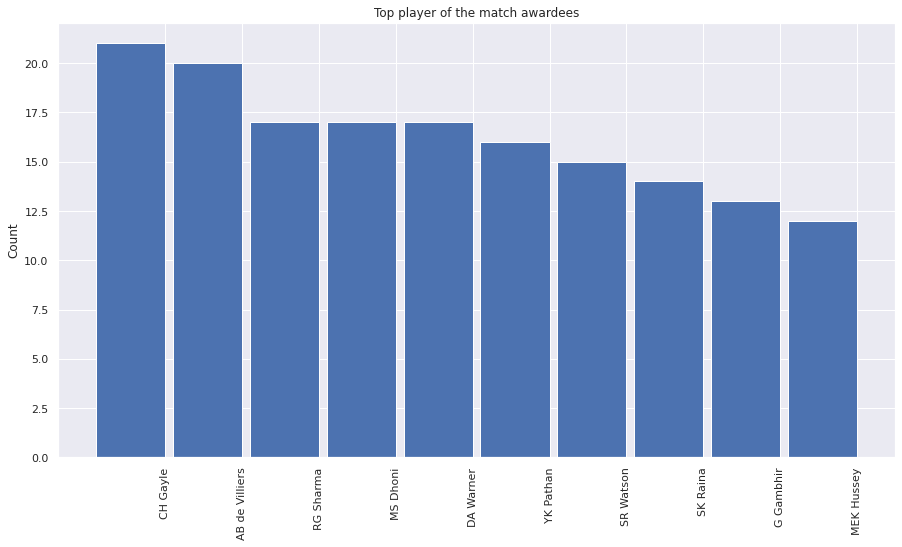

In [37]:
top_player = matches.player_of_match.value_counts()[:10]
labels = np.array(top_player.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(top_player), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
plt.show()

***Conclusion***
CH Gayle is the most player gained top player's awardees.

**And finally now let's see the umpires data**

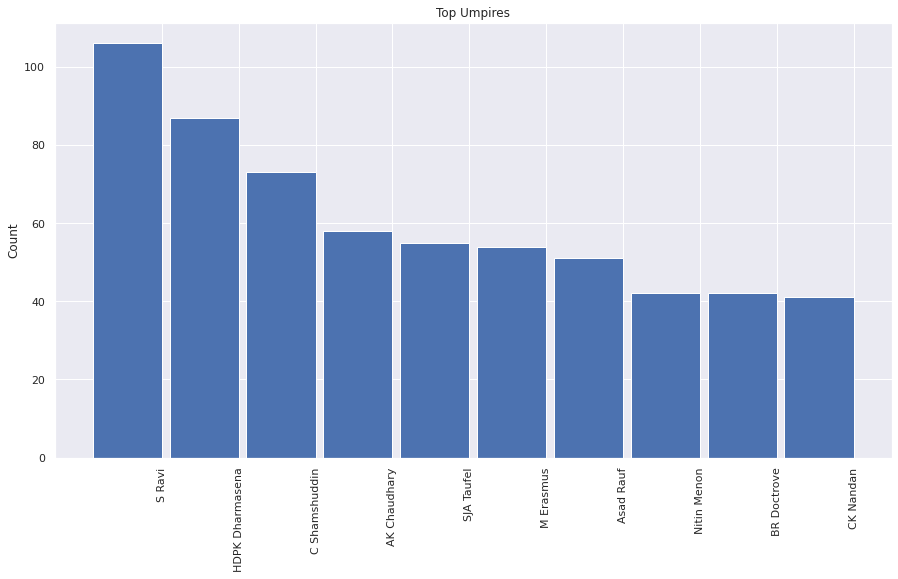

In [38]:
temp_df = pd.melt(matches, id_vars=['id'], value_vars=['umpire1', 'umpire2'])

umpires = temp_df.value.value_counts()[:10]
labels = np.array(umpires.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(umpires), width=width,)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
plt.show()

***Conclusion***

**Dharmasena seems to be the most sought after umpire for IPL matches followed by Ravi. Others are fairly close to each other.**

# **Thank you!**
**So finally we are done with the analysis here, I hope you liked my conclusions and my analysis of this meaty data!**